### Descripción del proceso de unión de los datasets de metadatos y de reviews:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### EDA

Cargamos los archivos json y los concatenamos:

In [2]:
tx_hotels= pd.read_parquet('tx_hotels.parquet')

In [3]:
tx_hotels.head()

,user_id,time,rating,text,business name,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,state
0,1.074846e+20,2019-04-23 08:52:42.665,5,Wonderful people! Look forward to getting to k...,Pine Tree Masonic Lodge,"Pine Tree Masonic Lodge, 2709 Pine Tree Rd, Lo...",None,32.534913,-94.808631,Lodge,4.3,8,No Price,None
1,1.112976e+20,2019-12-02 03:43:52.124,4,For the more mature crowd,Pine Tree Masonic Lodge,"Pine Tree Masonic Lodge, 2709 Pine Tree Rd, Lo...",None,32.534913,-94.808631,Lodge,4.3,8,No Price,None
2,1.110295e+20,2021-01-07 04:53:47.209,4,(Translated by Google) A O K\n\n(Original)\nA ...,Pine Tree Masonic Lodge,"Pine Tree Masonic Lodge, 2709 Pine Tree Rd, Lo...",None,32.534913,-94.808631,Lodge,4.3,8,No Price,None
3,1.146522e+20,2016-12-16 21:34:40.848,5,None,Pine Tree Masonic Lodge,"Pine Tree Masonic Lodge, 2709 Pine Tree Rd, Lo...",None,32.534913,-94.808631,Lodge,4.3,8,No Price,None
4,1.089870e+20,2019-05-16 00:50:52.433,5,None,Pine Tree Masonic Lodge,"Pine Tree Masonic Lodge, 2709 Pine Tree Rd, Lo...",None,32.534913,-94.808631,Lodge,4.3,8,No Price,None


In [4]:
categories = tx_hotels['category'].unique()

# Imprimir los registros únicos
print(categories)

['Lodge' 'Motel' 'Hotel' 'Lodging' 'Resort hotel' 'Indoor lodging' 'Inn'
 'Extended stay hotel' 'Self-catering accommodation' 'Mountain cabin'
 'Pet friendly accommodation' 'Cabin rental agency' 'Retreat center'
 'Health resort' 'Hostel' 'Camping cabin' 'Group accommodation'
 'Yoga retreat center' 'Wellness hotel' 'Homestay' 'Love hotel'
 'Serviced accommodation']


In [5]:
#top de los hoteles con mejores calificaciones
media_rating = tx_hotels.groupby('business name')['rating'].mean()
top_15 = media_rating.sort_values(ascending=False).head(15)
print(top_15)

business name
Sunflower Beach Resort and Residences                                   5.000000
King Country Lake Cabin Rental                                          5.000000
Texoma Destinations                                                     5.000000
Brown Estate of Lamar State College - Orange                            5.000000
Brazos House Retreat                                                    5.000000
The Pines Catholic Camp                                                 5.000000
Green Door Lofts                                                        5.000000
Red Barn Pet Ranch                                                      5.000000
Ethridge Farms B&B                                                      5.000000
Frios Gourmet Pops                                                      5.000000
Painted Pony Tea Room & Cafe ~ Musical Murder Mystery Dinner Theater    4.966667
Gray Lodge #329 Masonic Lodge                                           4.947368
The Winfield I

### TOP 10 DE LOS HOTELES MÁS VISITADOS

In [6]:
conteo_gmap_id = tx_hotels['business name'].value_counts()
top_10_gmap_id = conteo_gmap_id.nlargest(10)

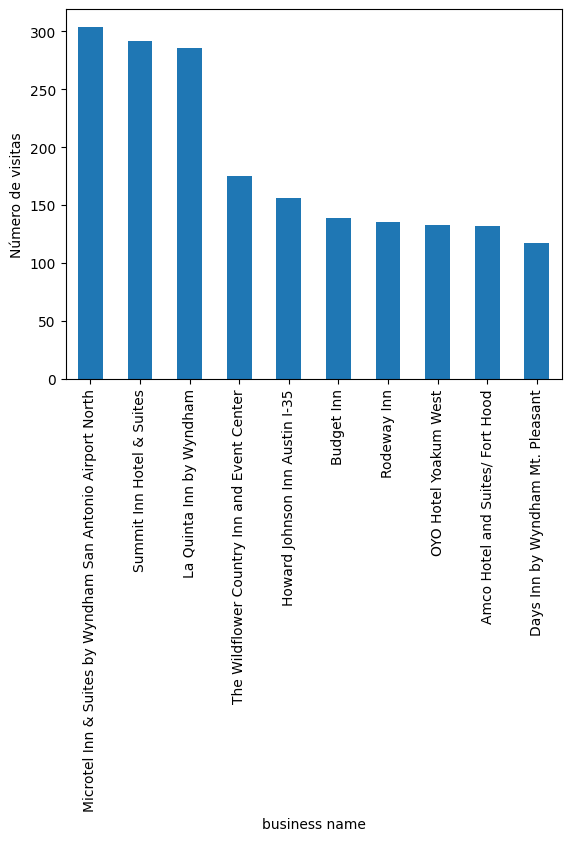

In [7]:
#Grafica de los hoteles mas visitados.
top_10_gmap_id.plot.bar()
plt.xlabel('business name')
plt.ylabel('Número de visitas')
plt.show()

### TOP 10 DE LAS CATEGORÍAS DE HOTEL MÁS VISITADOS

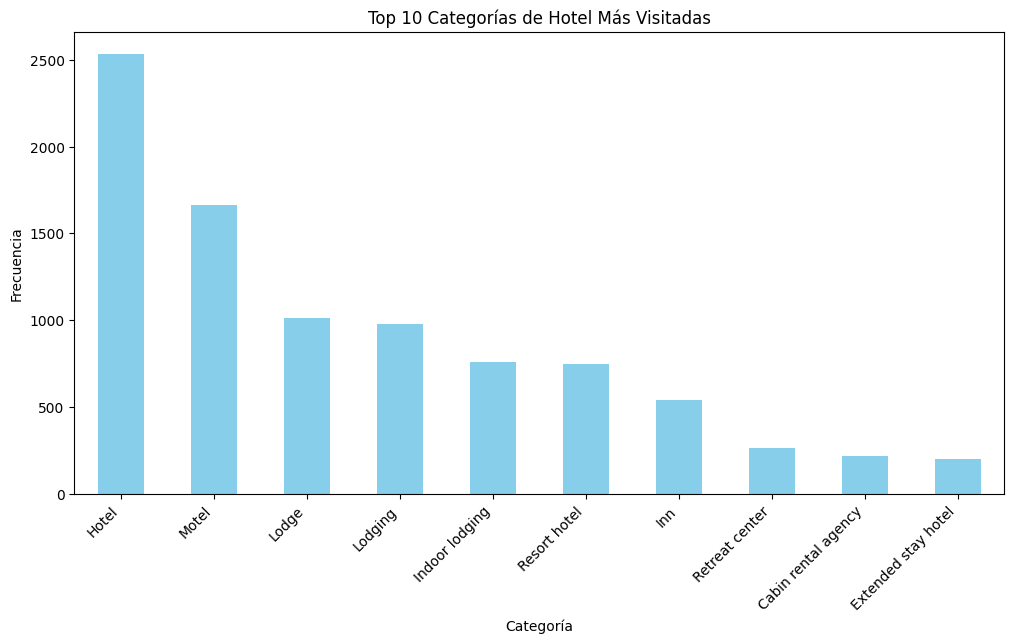

In [8]:
#Contamos la frecuencia de cada categoría contenida en el DataFrame filtrado
category_counts = tx_hotels['category'].value_counts()

# Seleccionamos las 10 categorías más frecuentes para graficarlos en el histograma
top_categories = category_counts.head(10)

# Se crear el histograma
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categorías de Hotel Más Visitadas')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

### HISTOGRAMA DE VISITAS DE CADA CATEGORÍA POR AÑO

<Figure size 1200x600 with 0 Axes>

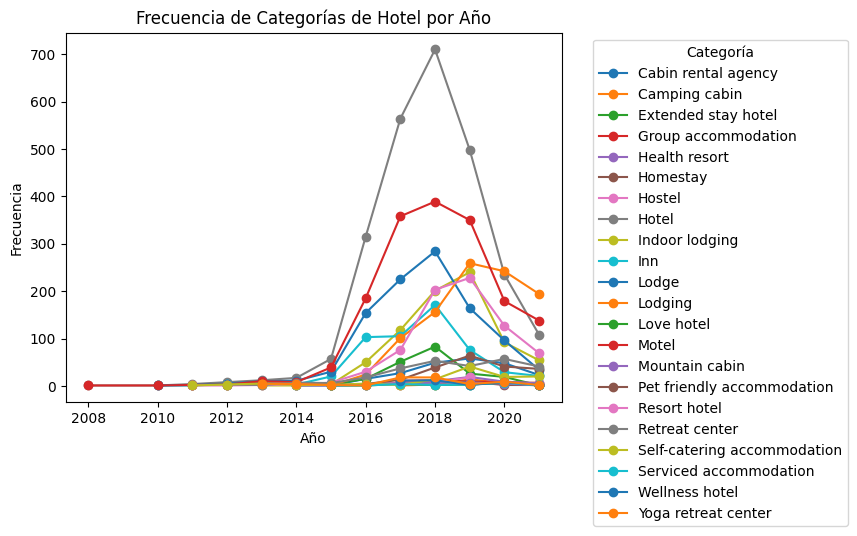

In [9]:

tx_hotels.loc[:, 'time'] = pd.to_datetime(tx_hotels['time'])

# Agrupar por año y contar la frecuencia de cada categoría
grouped_by_year = tx_hotels.groupby([tx_hotels['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

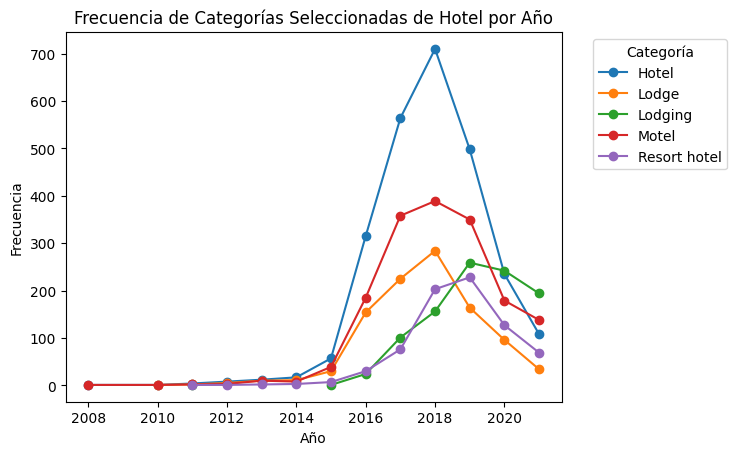

In [10]:
# Filtramos el DataFrame 
selected_categories = ['Resort hotel', 'Hotel', 'Motel', 'Lodge', 'Lodging']
filtered_by_categories = tx_hotels[tx_hotels['category'].isin(selected_categories)]

# Agrupar por año y contar la frecuencia de cada categoría
grouped_by_year = filtered_by_categories.groupby([filtered_by_categories['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías Seleccionadas de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Rating vs Reviews: 

La mayoria de reviews son de 3.0 a 5 estrellas. Lo que da a entender opiniones variadas acerca de los negocios por parte de los clientes.

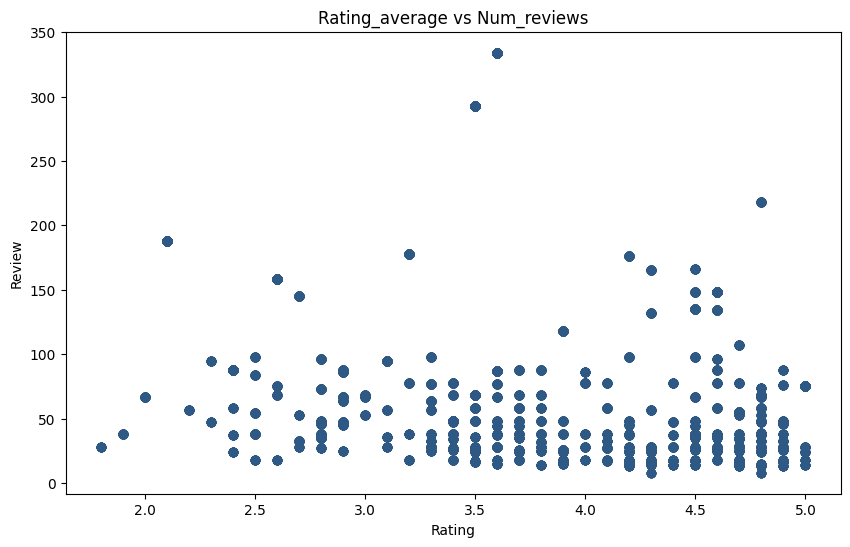

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(tx_hotels['avg_rating'], tx_hotels['num_of_reviews'], color='#2E5984') #, width=0.25
#sns.violinplot(x=metdat_sitios_fl['stars'], y=metdat_sitios_fl['review_count'], inner="quartile", palette="pastel")
plt.title('Rating_average vs Num_reviews')
plt.xlabel('Rating')
plt.ylabel('Review')
#plt.grid(True)
plt.show()

### Número de negocios (categoria) de la muestra de google maps en el estado de Texas.

In [13]:
columns_to_count = ['category']

for column in columns_to_count:
    counts = tx_hotels[column].value_counts()
    print(f"Counts for column '{column}':")
    print(counts)

Counts for column 'category':
category
Hotel                          2530
Motel                          1663
Lodge                          1016
Lodging                         978
Indoor lodging                  760
Resort hotel                    747
Inn                             541
Retreat center                  266
Cabin rental agency             222
Extended stay hotel             202
Pet friendly accommodation      199
Self-catering accommodation     114
Yoga retreat center              63
Health resort                    48
Group accommodation              46
Hostel                           39
Wellness hotel                   35
Camping cabin                    31
Homestay                         31
Mountain cabin                   30
Love hotel                       19
Serviced accommodation           19
Name: count, dtype: int64


### Verificación de Outliers en rating y reviews

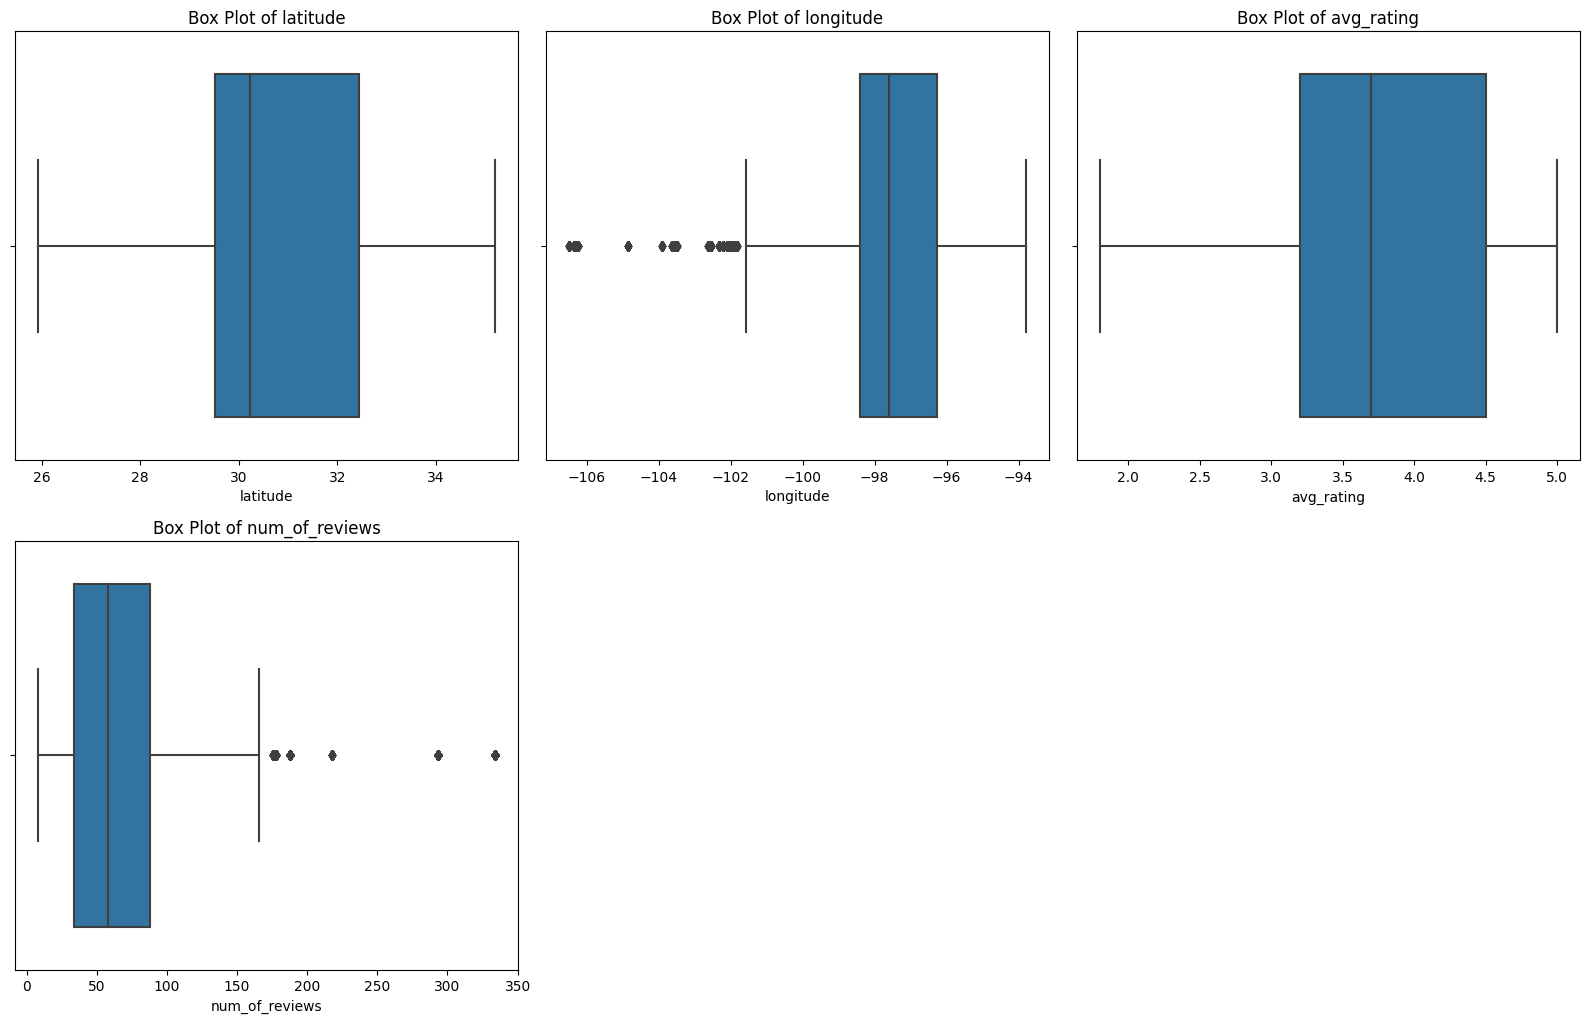

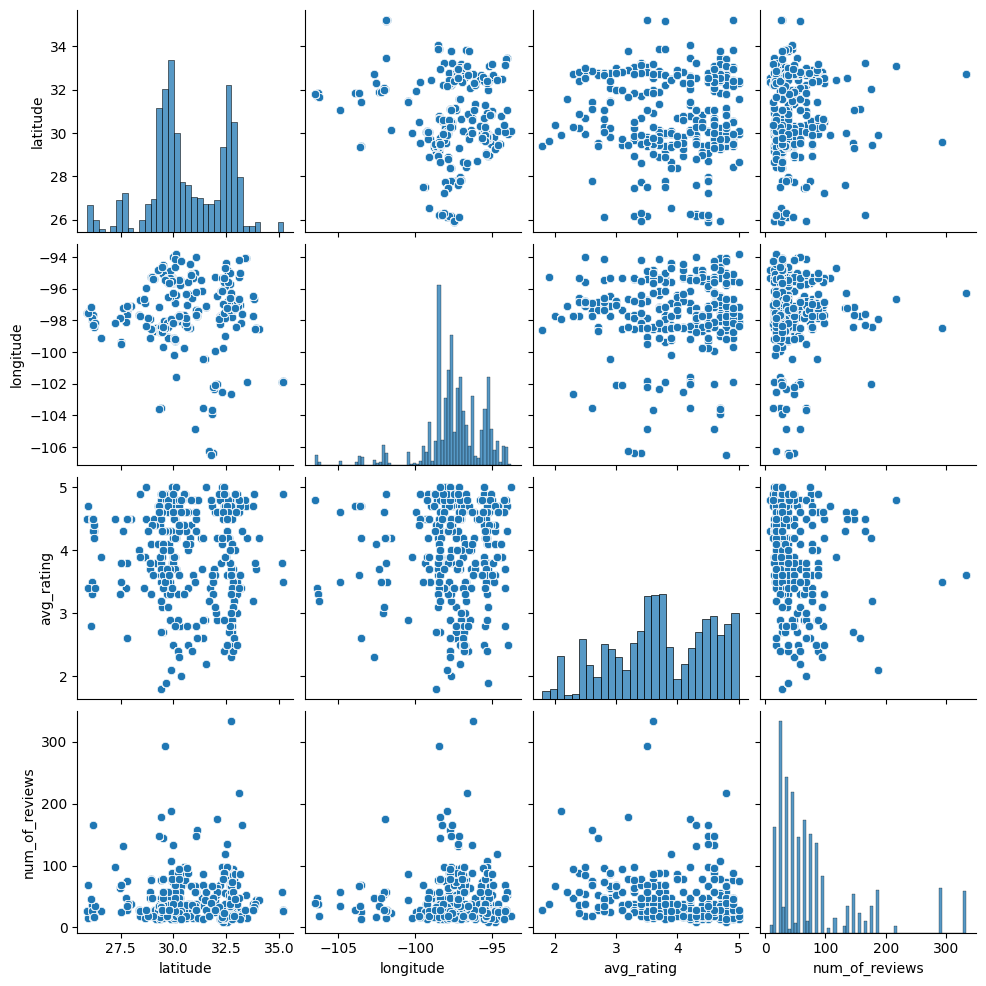

In [14]:
numerical_columns = ['latitude'	,'longitude','avg_rating','num_of_reviews']

# Create subplots for each numerical column
fig = plt.figure(figsize=(16, 15))
for i, column in enumerate(numerical_columns):
    ax = fig.add_subplot(3, 3, i+1)
    sns.boxplot(x=tx_hotels[column], ax=ax)
    ax.set_title(f"Box Plot of {column}")

plt.tight_layout()
plt.show()

# Create scatter plots for pairwise combinations of numerical columns
sns.pairplot(tx_hotels[numerical_columns])
plt.show()

### Categorías más comentadas:

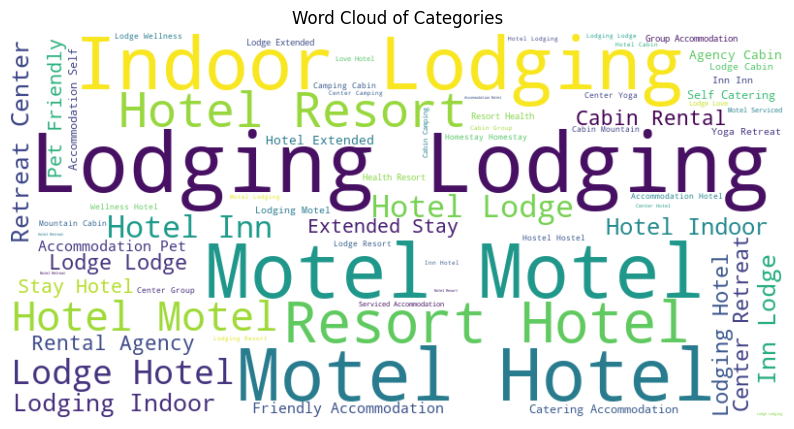

In [15]:
from wordcloud import WordCloud

tx_hotels.loc[:, 'category'] = tx_hotels['category'].str.title()  # Apply .str.title() to the 'category' Series
text = ' '.join(tx_hotels['category'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories')
plt.show()